<a href="https://colab.research.google.com/github/BeatrizPCandido/pretalab-ciclo14-git-github/blob/main/Aula_22_An%C3%A1lise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicação de técnicas de análise de dados em cenários do mundo real

## Análise de Dados Reais com BMW Sales (2010–2024)

### Dataset
Link original: https://www.kaggle.com/datasets/ahmadrazakashif/bmw-worldwide-sales-records-20102024

Link drive: https://drive.google.com/file/d/1gB5rCQVIDi1hQnuLDAu4A22PE3uK832u/view?usp=sharing

## 1. Importação e configuração inicial

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10,5)

In [22]:
# Carregar o dataset
df = pd.read_csv("/content/.config/BMW sales data (2010-2024) (1).csv")

## 2. Exploração inicial dos dados

### Exercício 1 — Inspeção básica

* Verifique as 5 primeiras linhas.
* Mostre informações gerais (.info()).
* Verifique valores nulos e tipos de dados.
* Mostre estatísticas descritivas.

In [23]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [25]:
df.Model.value_counts()

,count
Model,
7 Series,4666
i3,4618
i8,4606
3 Series,4595
5 Series,4592
X1,4570
X3,4497
X5,4487
M5,4478


In [26]:
df.Model.value_counts()

,count
Model,
7 Series,4666
i3,4618
i8,4606
3 Series,4595
5 Series,4592
X1,4570
X3,4497
X5,4487
M5,4478


In [27]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [28]:
df.describe(include="all")

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
count,50000,50000.000000,50000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000
unique,11,NaN,6,6,4,2,NaN,NaN,NaN,NaN,2
top,7 Series,NaN,Asia,Red,Hybrid,Manual,NaN,NaN,NaN,NaN,Low
freq,4666,NaN,8454,8463,12716,25154,NaN,NaN,NaN,NaN,34754
mean,NaN,2017.015700,NaN,NaN,NaN,NaN,3.247180,100307.203140,75034.600900,5067.514680,NaN
std,NaN,4.324459,NaN,NaN,NaN,NaN,1.009078,57941.509344,25998.248882,2856.767125,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,1.500000,3.000000,30000.000000,100.000000,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,2.400000,50178.000000,52434.750000,2588.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.200000,100388.500000,75011.500000,5087.000000,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,4.100000,150630.250000,97628.250000,7537.250000,NaN


In [29]:
df.Region.value_counts()

,count
Region,
Asia,8454
Middle East,8373
North America,8335
Europe,8334
Africa,8253
South America,8251


In [30]:
df.Fuel_Type.value_counts()

,count
Fuel_Type,
Hybrid,12716
Petrol,12550
Electric,12471
Diesel,12263


In [31]:
df.Transmission.value_counts()

,count
Transmission,
Manual,25154
Automatic,24846


In [32]:
df.Sales_Classification.value_counts()

,count
Sales_Classification,
Low,34754
High,15246


In [33]:
df.Year.value_counts()

,count
Year,
2022,3478
2024,3427
2019,3392
2021,3372
2016,3365
2015,3358
2014,3350
2012,3332
2010,3330


In [34]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


💬 Observe:

- Quais colunas são numéricas e quais são categóricas?

- Há dados faltantes ou inconsistências?

- Alguma variável precisa ser convertida (ex: Year para inteiro)?

## 3. Limpeza e padronização

### Exercício 2

- Corrija eventuais valores nulos em Region e Fuel_Type.
- Padronize letras maiúsculas/minúsculas.
- Verifique outliers em Price_USD e Mileage_KM.

In [16]:
df['Sales_Classification'] = df['Sales_Classification'].str.upper()
df['Transmission'] = df['Transmission'].str.lower()


In [35]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


Text(0.5, 1.0, 'Rodagem - Milhas por KM')

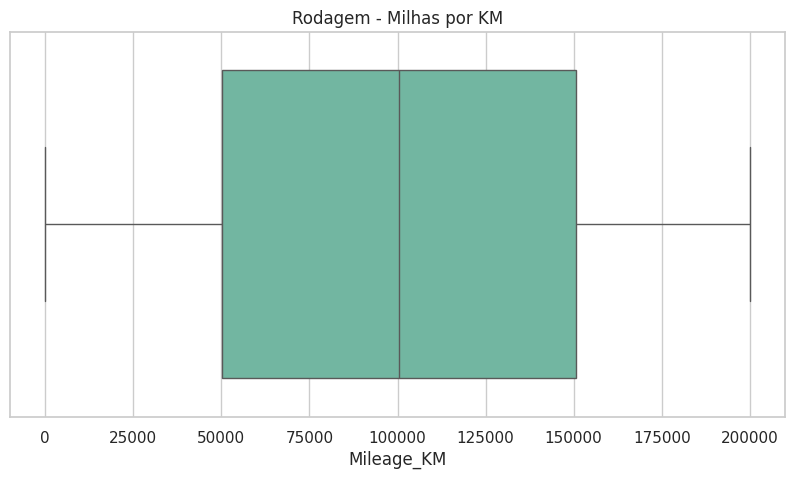

In [37]:
sns.boxplot(x=df['Mileage_KM'])
plt.title('Rodagem - Milhas por KM')

Text(0.5, 1.0, 'Preço - Dólares')

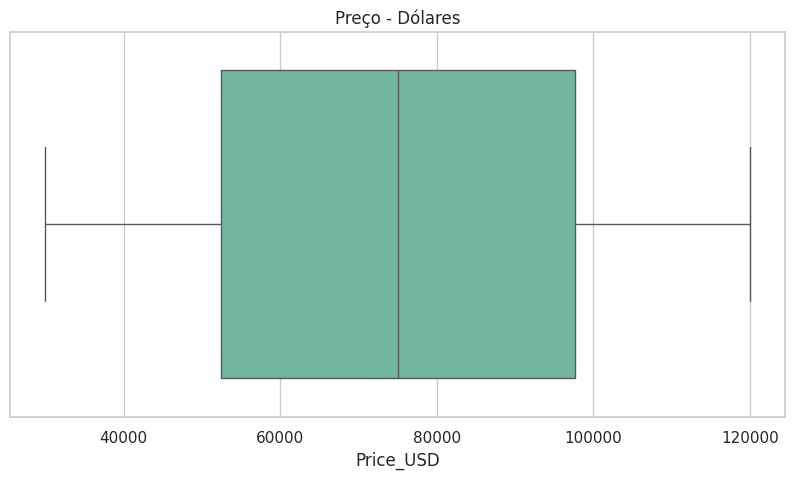

In [38]:
sns.boxplot(x=df['Price_USD'])
plt.title('Preço - Dólares')

💬 Observe:

- Existem outliers visíveis?

- São erros ou refletem versões premium do veículo?

## 4. Estatística descritiva e visualização

### Exercício 3 — Panorama geral

Crie um resumo visual com:

- Distribuição de preços
- Distribuição de vendas (Sales_Volume)
- Contagem de veículos por combustível

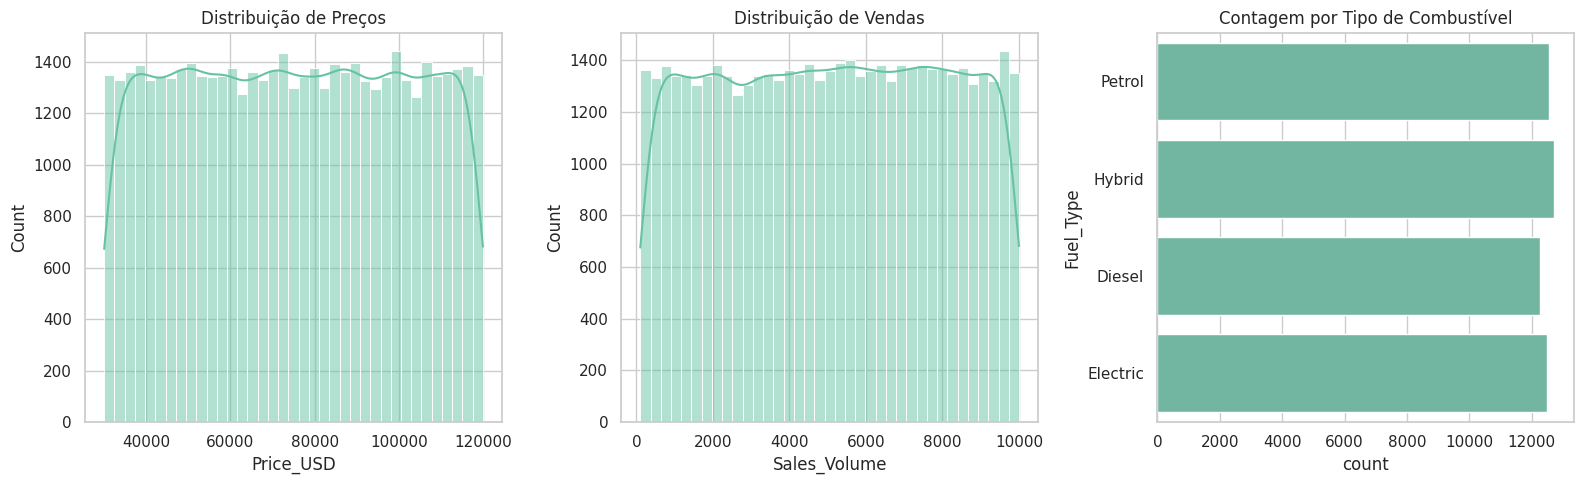

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.histplot(df['Price_USD'], kde=True, ax=ax[0])
sns.histplot(df['Sales_Volume'], kde=True, ax=ax[1])
sns.countplot(y='Fuel_Type', data=df, ax=ax[2])

ax[0].set_title('Distribuição de Preços')
ax[1].set_title('Distribuição de Vendas')
ax[2].set_title('Contagem por Tipo de Combustível')

plt.tight_layout()

Text(0, 0.5, 'Ano')

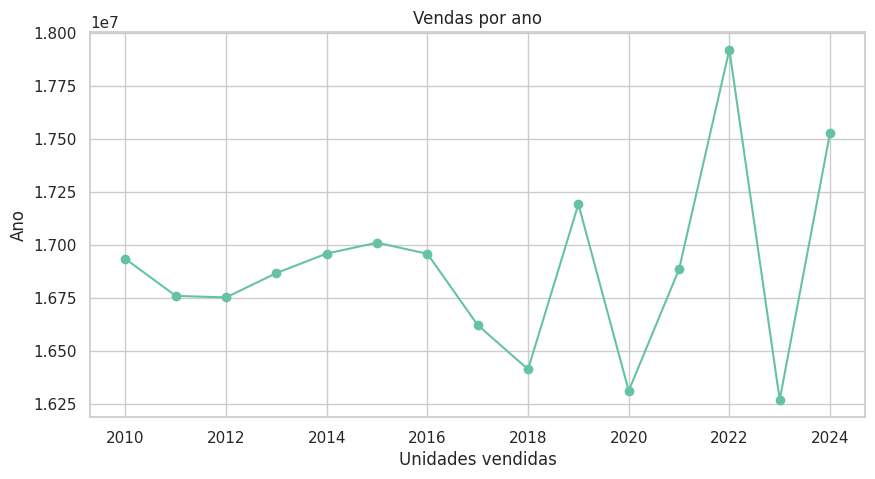

In [40]:
df.groupby('Year')['Sales_Volume'].sum().plot(marker='o')
plt.title('Vendas por ano')
plt.xlabel('Unidades vendidas')
plt.ylabel('Ano')

### Exercício 4 — Tendência ao longo do tempo

Calcule e visualize o total de vendas por ano.

<Axes: xlabel='Region'>

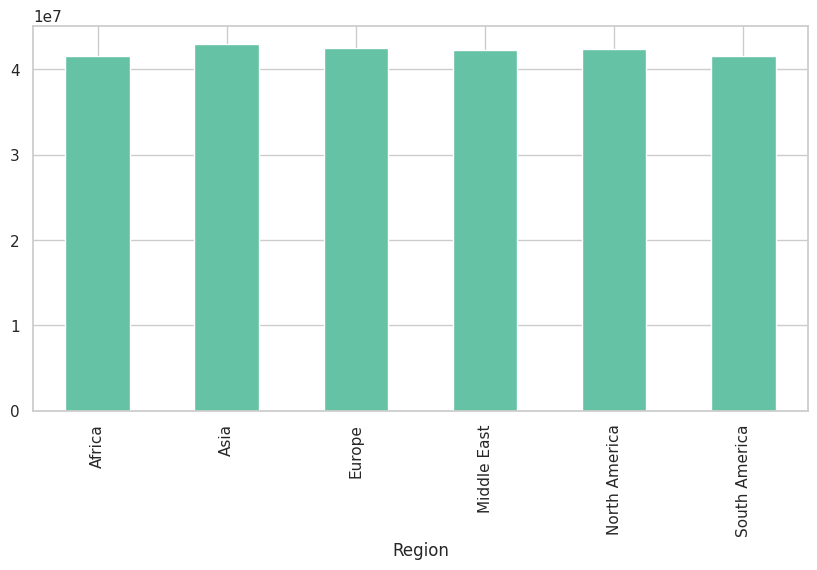

In [41]:
df.groupby('Region')['Sales_Volume'].sum().plot(kind='bar')

<Axes: >

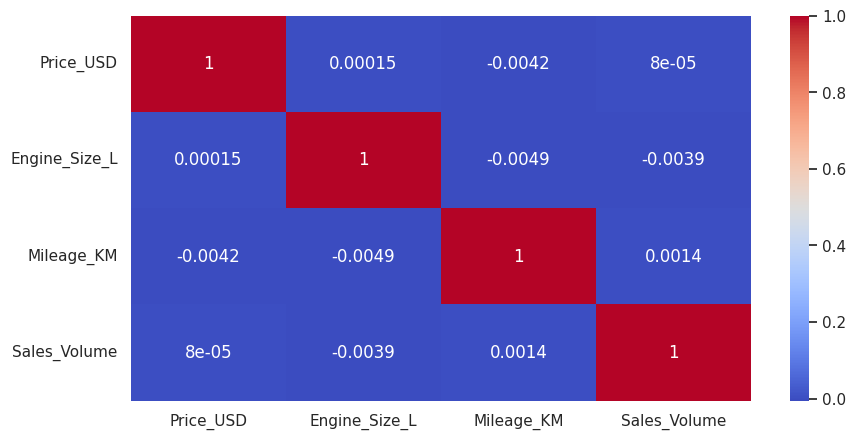

In [44]:
num_cols = ['Price_USD', 'Engine_Size_L', 'Mileage_KM', 'Sales_Volume']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Mileage_KM', ylabel='Price_USD'>

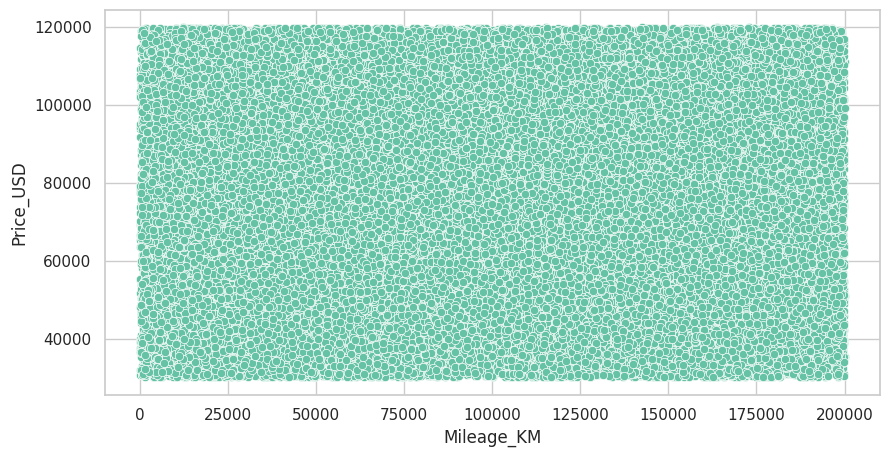

In [47]:
sns.scatterplot(x='Mileage_KM', y='Price_USD', data=df)

💬 Observe:

- O mercado cresceu ou caiu nos últimos anos?

- Há picos de vendas em algum período (ex: lançamentos, eletrificação)?

### Exercício 5 — Comparando regiões

💬 Observe:

- Qual região lidera as vendas?

- O crescimento é global ou concentrado em poucos mercados?

### Exercício 6 — Relação entre preço, motor e vendas

💬 Observe:

- Preços maiores estão associados a motores maiores?

- O volume de vendas é afetado pelo preço?

### Exercício 7 — Construa um gráfico de insights

Crie um gráfico de dispersão mostrando como preço, motor e vendas se relacionam:

💬 Observe:

- Modelos com motor maior são sempre mais caros?

- Veículos híbridos ou elétricos seguem um padrão diferente?

### Desafio

- Escolha uma questão de negócio e elabore sua própria análise.

Exemplos:

- Qual linha de modelo da BMW teve maior crescimento?

- Como as vendas de elétricos evoluíram nos últimos 5 anos?

- O preço influencia diretamente o volume de vendas em cada região?